In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("..")

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as sk_LinearRegression

In [4]:
X, y = load_diabetes(return_X_y=True)

In [5]:
X.shape, y.shape

((442, 10), (442,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# OLS

In [7]:
from algosfromscratch.supervised_learning import LinearRegression

In [8]:
lr = LinearRegression(method='OLS')

In [9]:
lr.fit(X_train, y_train)

In [10]:
lr.intercept_, lr.coef_

(154.35898821355187,
 array([ -20.41129305, -265.88594023,  564.64844662,  325.55650029,
        -692.23796104,  395.62249978,   23.52910434,  116.37102129,
         843.98257585,   12.71981044]))

In [11]:
y_pred = lr.predict(X_test)

In [12]:
np.sum((y_pred - y_test) ** 2)

679648.6699179362

In [13]:
lr_sk = sk_LinearRegression()

In [14]:
lr_sk.fit(X_train, y_train)

LinearRegression()

In [15]:
lr_sk.intercept_, lr_sk.coef_

(154.3589882135515,
 array([ -20.41129305, -265.88594023,  564.64844662,  325.55650029,
        -692.23796104,  395.62249978,   23.52910434,  116.37102129,
         843.98257585,   12.71981044]))

In [16]:
y_pred_sk = lr_sk.predict(X_test)

In [17]:
np.sum((y_pred_sk - y_test) ** 2)

679648.6699179354

# Stochastic GD (batch_size = 1)

In [18]:
lr_sgd = LinearRegression(method='GD', batch_size=1, learning_rate=0.001, num_epochs=1000)

In [19]:
lr_sgd.fit(X_train, y_train)

In [20]:
lr_sgd.intercept_

151.8108048134627

In [21]:
lr_sgd.coef_

array([  32.83393629,  -58.52281712,  272.47413391,  192.44464378,
         49.50408356,    8.99159112, -165.27546182,  141.99909056,
        287.0322838 ,  138.54690173])

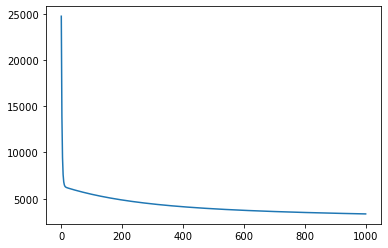

In [22]:
_ = plt.plot(lr_sgd.training_losses)

plt.show()

In [23]:
y_pred_sgd = lr_sgd.predict(X_test)

In [24]:
np.sum((y_pred_sgd - y_test) ** 2)

713218.9804721463

# Mini-Batch GD (batch_size = 20)

In [25]:
lr_mbgd = LinearRegression(method='GD', batch_size=20, learning_rate=0.0015, num_epochs=1000)

In [26]:
lr_mbgd.fit(X_train, y_train)

In [27]:
lr_mbgd.intercept_

152.29386902348753

In [28]:
lr_mbgd.coef_

array([  22.89386262,  -99.63344369,  339.12445653,  226.64470517,
         33.26745436,  -22.96611138, -187.62172048,  144.11567223,
        348.15229718,  141.77951132])

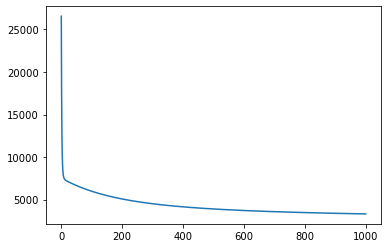

In [29]:
_ = plt.plot(lr_mbgd.training_losses)

plt.show()

In [30]:
y_pred_mbgd = lr_mbgd.predict(X_test)

In [31]:
np.sum((y_pred_mbgd - y_test) ** 2)

681943.7139258457

# Batch GD (batch_size = inf)

In [32]:
lr_bgd = LinearRegression(method='GD', batch_size=float('inf'), learning_rate=0.002, num_epochs=1000)

In [33]:
lr_bgd.fit(X_train, y_train)

In [34]:
lr_bgd.intercept_

152.59745536345025

In [35]:
lr_bgd.coef_

array([  12.92182177, -135.06113588,  387.22866823,  249.32208975,
         16.53297581,  -52.05245109, -200.40395695,  139.49042279,
        391.97488645,  135.14260264])

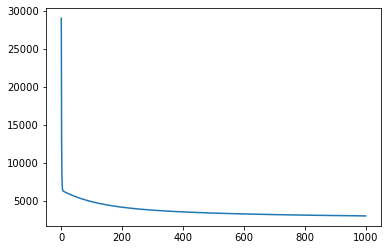

In [36]:
_ = plt.plot(lr_bgd.training_losses)

plt.show()

In [37]:
y_pred_bgd = lr_bgd.predict(X_test)

In [38]:
np.sum((y_pred_bgd - y_test) ** 2)

667385.1382926353